# Напишите заголовок проекта здесь

- Автор:
- Дата:

### Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

### Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# !pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import numpy as np

In [3]:
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
for column in info_df.columns:
    t = len(info_df[info_df[column].isna()])
    if t > 0:
        print(f"В столбце {column} есть {t} пропусков, это {round((t / info_df.shape[0])* 100, 2)}% от количества записей")

В столбце hours есть 536 пропусков, это 6.38% от количества записей
В столбце seats есть 3611 пропусков, это 42.96% от количества записей


In [7]:
info_df.describe()

,rating,chain,seats
count,8406.000000,8406.000000,4795.000000
mean,4.229895,0.381275,108.421689
std,0.470348,0.485729,122.833396
min,1.000000,0.000000,0.000000
25%,4.100000,0.000000,40.000000
50%,4.300000,0.000000,75.000000
75%,4.400000,1.000000,140.000000
max,5.000000,1.000000,1288.000000


In [8]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [10]:
for column in price_df.columns:
    t = len(price_df[price_df[column].isna()])
    if t > 0:
        print(f"В столбце {column} есть {t} пропусков, это {round((t / price_df.shape[0])* 100, 2)}% от количества записей")

В столбце price есть 743 пропусков, это 18.31% от количества записей
В столбце avg_bill есть 242 пропусков, это 5.96% от количества записей
В столбце middle_avg_bill есть 909 пропусков, это 22.4% от количества записей
В столбце middle_coffee_cup есть 3523 пропусков, это 86.82% от количества записей


In [11]:
price_df.describe()

,middle_avg_bill,middle_coffee_cup
count,3149.000000,535.000000
mean,958.053668,174.721495
std,1009.732845,88.951103
min,0.000000,60.000000
25%,375.000000,124.500000
50%,750.000000,169.000000
75%,1250.000000,225.000000
max,35000.000000,1568.000000


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

  - Предоставлены 2 датафрейма с информацией о заведениях общественного питания: rest_info (8406 строк и 9 столбцов) - информация относительно назавния, категории, адреса, рейтинга и прочее; rest_price (4058 строк и 5 столбцов) - информация о ценовой политике заведения
  - В датафрейме rest_info можно исправить снизить тип данных int64 до int8 в столбце chain для улучшения производительности; в датафрейме также существует 2 столбца в котором есть пустые значения - это hours (6.4% пустых) и seats (43% пустых). Можно предположить, что большое количество пропусков в seats объясняется работой заведения "навынос" и не предусматривает посадочные места.
  - В датафрейме rest_price нет проблем с типами данных, однако существуют проблемы с пропусками: столбцы price (18.3% пропусков), avg_bill (6% пустых), middle_avg_bill (22.4% пустых), middle_coffee_cup (86.8% пустых) имеют пропуски.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [12]:
df = info_df.merge(price_df, how='left', on='id')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [14]:
# Снижаем int64 до int8 в столбце chain
df['chain']  = pd.to_numeric(df['chain'], downcast='integer')

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

Пропуски не мешают, поэтому не трогаем

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [15]:
# Приводим столбцы типа object к нижнему регистру и удаляем лишние пробелы
for column in ['name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill']:
    df[column] = df[column].str.lower().str.strip()
    
    
# смотрим есть ли проблемы с дублированием в категориальных столбцах
for i in ['category', 'district', 'price']:
    print(df[i].unique())
    print()

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']

['северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'западный административный округ' 'центральный административный округ'
 'восточный административный округ' 'юго-восточный административный округ'
 'южный административный округ' 'юго-западный административный округ']

[nan 'выше среднего' 'средние' 'высокие' 'низкие']



In [16]:
# Проверяем полные дубликаты
df.duplicated().sum()

0

In [17]:
# Проверяем дубликаты по столбцу id
df.duplicated(subset='id').sum()

0

In [18]:
# Считаем, что записи с одинаковыми названием и адресом это задвоения в данных, а потому удаляем их
print("Количество строк с одинаковым названием и адресом:", df.duplicated(subset=['name', 'address']).sum())

df = df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=False)

Количество строк с одинаковым названием и адресом: 4


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [19]:
def create_is_24_7(row):
    """
    Функция для заполнения нового столбца is_24_7
    """
    if isinstance(row, float):
        return np.nan
    elif 'круглосуточно' in row and 'ежедневно' in row:
        return True
    else:
        return False
    
df['is_24_7'] = df['hours'].apply(create_is_24_7) 

print(f"Количество заведений, работающих ежедневно и круглосуточно: {df['is_24_7'].sum()}")

Количество заведений, работающих ежедневно и круглосуточно: 730


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

  - Все строки столбцов типа object были приведены к нижнему регистру, также были удалены излишние пролбелы.
  - Пустые строки не мешают дальнейшему анализу, поэтому были оставлены как есть.
  - Явных дубликатов и задвоений в id найдено не было, однако, были найдены записи с одинаковыми названиями и одинаковыми адресами, такие записи расценили как дубликаты и удалили, всего таких записей было 4.
  - Был создан новый столбец "is_24_7" типа bool, который отображает True если заведение работает круглосуточно, False если нет и пустая строка, если график работы заведения неизвестен. Было найдено 730 заведений работающих круглосуточно.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [20]:
df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

<AxesSubplot:title={'center':'Количество заведений каждой категории'}>

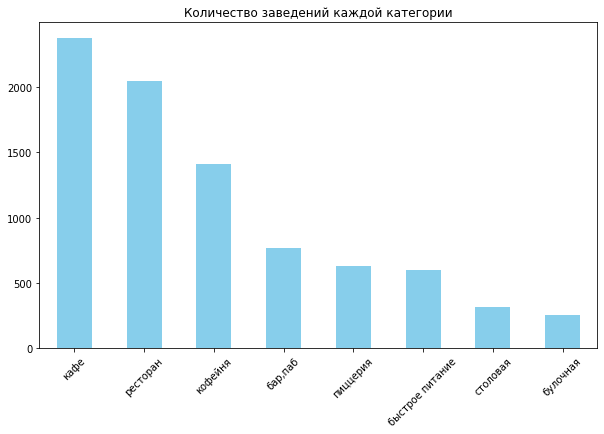

In [21]:
df['category'].value_counts().plot(
    kind='bar',
    title='Количество заведений каждой категории',
    figsize=(10, 6),
    rot=45,
    color='skyblue'
)

Выводы:
  - Топ 3 наиболее многочисленных категорий общепита Москвы являются: кафе (2376 шт.), рестораны (2042 шт.) и кофейни (1413 шт)
  - Самыми малочисленными оказались булочные (256 шт.) и столовые (315 шт.)
  - Количество баров/пабов, пиццерий и заведений быстрого питания оказалось примерно равным.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [22]:
# Сокращаем 'административный округ' до 'ао' чтобы все на график помещалось
df['district'] = df['district'].str.replace('административный округ', 'ао')

In [23]:
df['district'].value_counts()

центральный ао         2242
северный ао             898
южный ао                892
северо-восточный ао     890
западный ао             850
восточный ао            798
юго-восточный ао        714
юго-западный ао         709
северо-западный ао      409
Name: district, dtype: int64

<AxesSubplot:title={'center':'Количество заведений по административным округам'}>

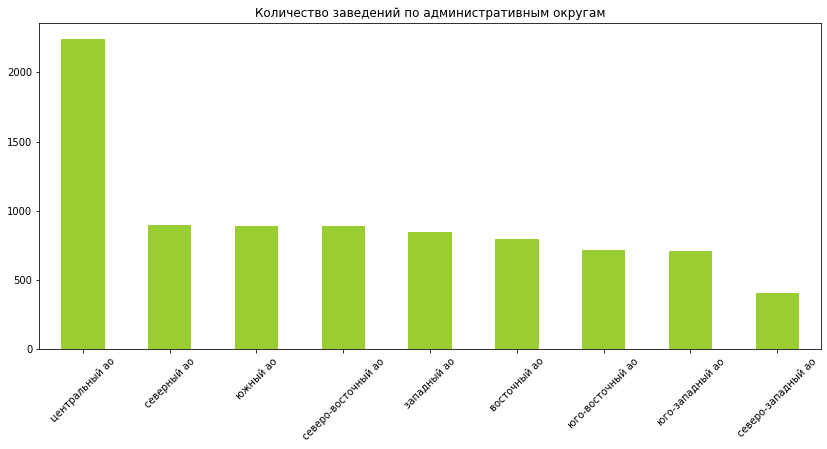

In [24]:
df['district'].value_counts().plot(
    kind='bar',
    figsize=(14, 6),
    rot=45,
    color='yellowgreen',
    title='Количество заведений по административным округам'
)

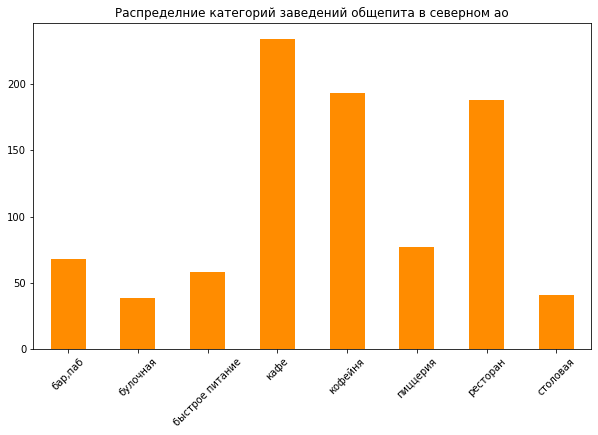

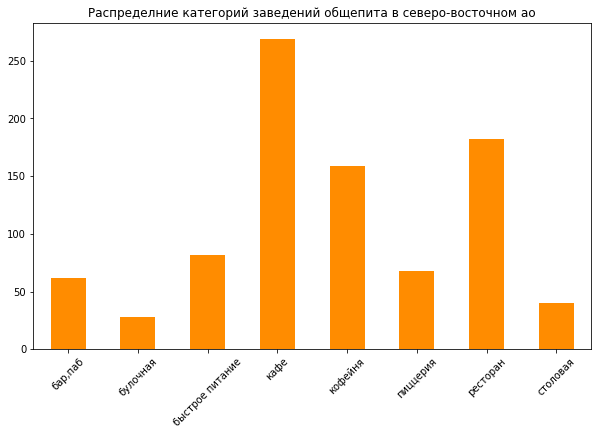

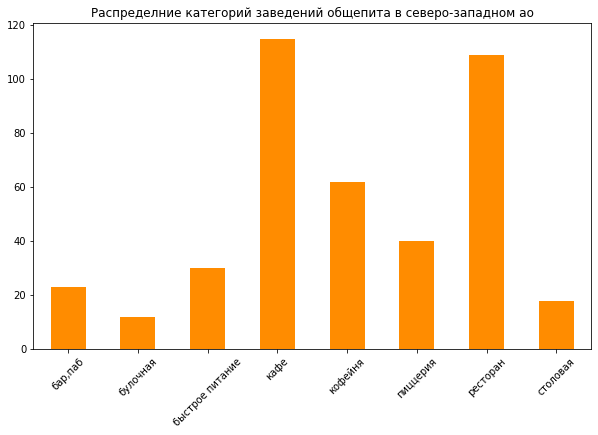

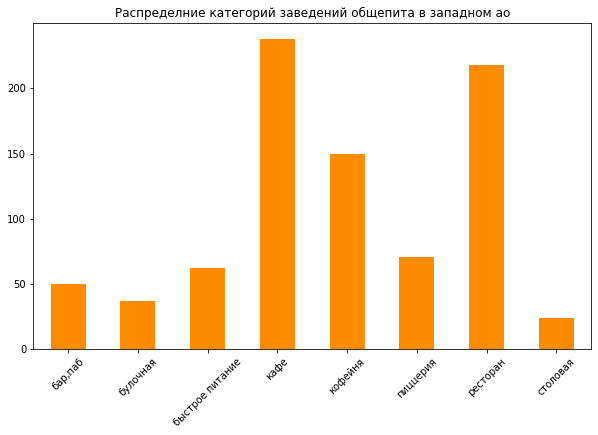

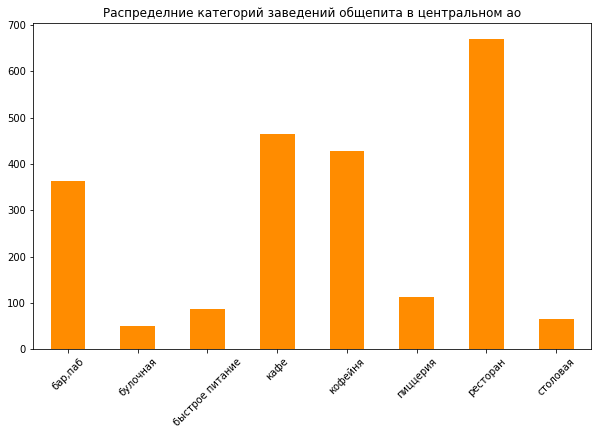

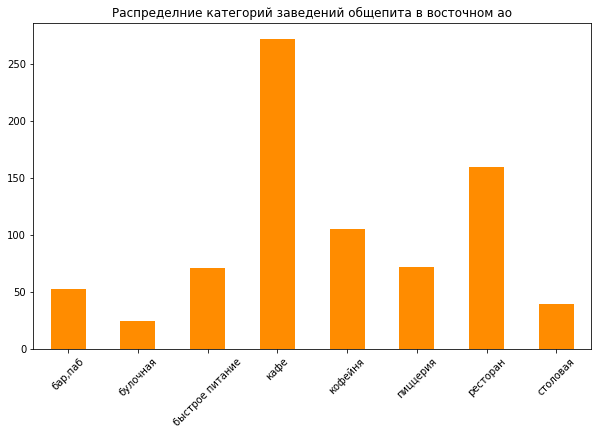

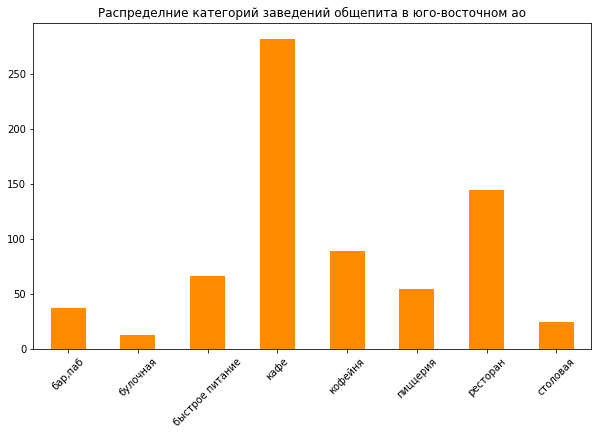

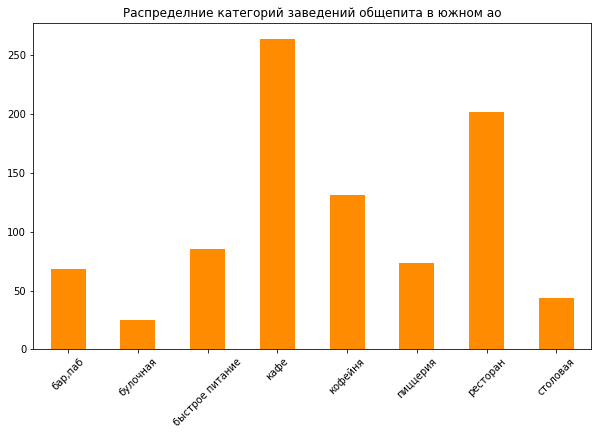

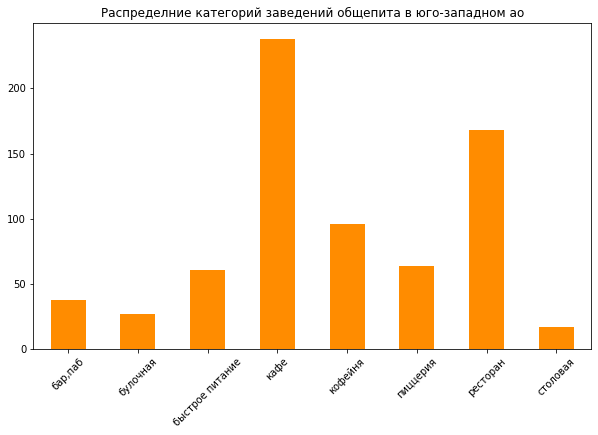

In [25]:
# Визуализация распределелий
for district in df['district'].unique():

    cao_df = df[df['district']==district].groupby('category')['category'].count()

    cao_df.plot(
        kind='bar',
        figsize=(10, 6),
        rot=45,
        xlabel='',
        title=f'Распределние категорий заведений общепита в {district.replace("ый", "ом")}',
        color='darkorange'
    )
    
    plt.show()

Выводы:
  - В данных представлены 9 административных округов: центральный, северный, южный, северо-восточный, западный, восточный, юго-восточный, юго-западный и северо-западный
  - Сильно выделяются по количеству заведений следующие округа: центральный (2242 шт.) и северо-западный (409 шт.). Остальные округа по количеству заведений примерно равны и находятся в диапазоне от 709 до 898 шт.
  - Во всех округах наибольшее количество заведений наблюдается в категориях "ресторан" и "кафе", во всех округах, кроме центрального, количество кафе превышает ресторан.
  - Центральный округ выделяется среди прочих высоким количеством заведений в непопулярной категории бар/паб.
  - В северном и северо-восточном округах наблюдается большое количество кофейней, сравнимое с количеством ресторанов.
  - Самыми малочисленными категориями во всех областях являются столовые и булочные.
  - Во всех округах количество заведений быстрого питания и пиццерий находятся примерно на одном уровне в диапазоне от 30 до 100.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [26]:
df['chain'].value_counts()

0    5199
1    3203
Name: chain, dtype: int64

<AxesSubplot:title={'center':'Количество сетевых и несетевых заведений'}, xlabel='Сетевое заведение'>

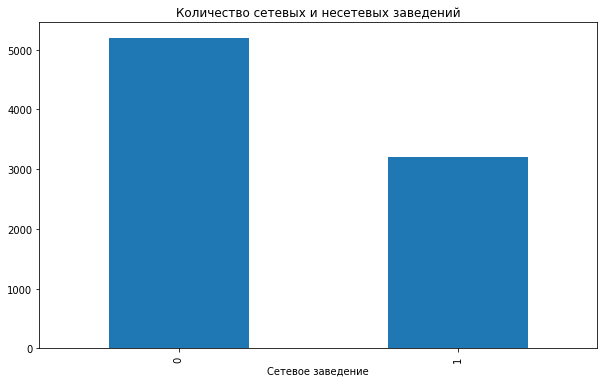

In [27]:
df['chain'].value_counts().plot(
    kind='bar',
    title='Количество сетевых и несетевых заведений',
    figsize=(10, 6),
    xlabel='Сетевое заведение'
)

In [28]:
df.groupby(['chain', 'category'])['category'].count()

chain  category       
0      бар,паб             596
       булочная             99
       быстрое питание     371
       кафе               1597
       кофейня             693
       пиццерия            303
       ресторан           1313
       столовая            227
1      бар,паб             168
       булочная            157
       быстрое питание     232
       кафе                779
       кофейня             720
       пиццерия            330
       ресторан            729
       столовая             88
Name: category, dtype: int64

<AxesSubplot:title={'center':'Сетевые и несетевые заведения по категориям'}, xlabel='Сетевое заведение'>

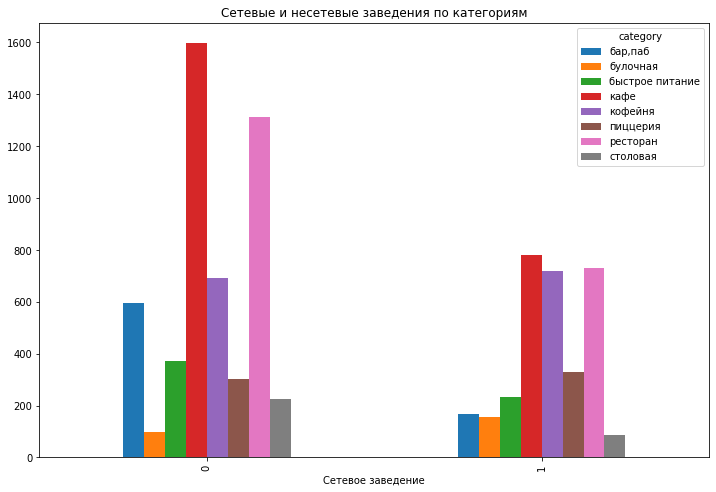

In [29]:
df_unstack = df.groupby(['chain'])['category'].value_counts().unstack(fill_value=0)

df_unstack.plot(kind='bar',
                figsize=(12, 8),
                title='Сетевые и несетевые заведения по категориям',
                xlabel='Сетевое заведение'
               )



Выводы:
  - Количество несетевых заведений в 1.6 раз превосходит количество сетевых заведений
  - Среди несетевых заведений выделяются категории кафе и рестораны как самые многочисленные
  - В сетевых заведениях выделяются 3 наиболее популярные категории - кафе, кофейни и рестораны, их количество варьируется на уровне 700-800 шт.
  - Количество несетевых баров/пабов в 3.5 раз больше чем сетевых. Число несетевых столовых в 2.6 раз больше сетевых
  - Количество пиццерий и заведений быстрого питания среди сетевых и несетевых находится примерно на одном уровне
  - Количество сетевых булочных в 1.6 раз больше чем несетевых 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


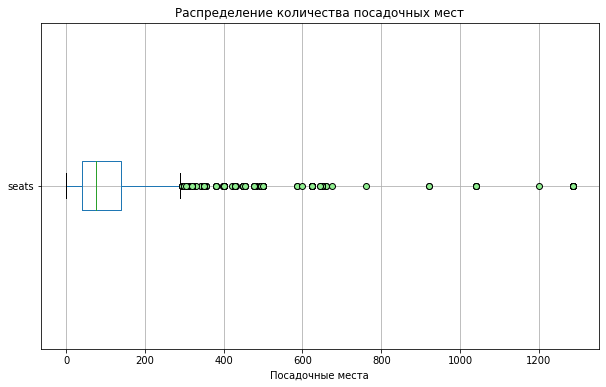

In [30]:
boxplot = df.boxplot(
    column = 'seats',
    figsize = (10, 6),
    vert=False,
    flierprops = dict(markerfacecolor='lightgreen', marker='o')
)

boxplot.set_title('Распределение количества посадочных мест')
boxplot.set_xlabel('Посадочные места')

plt.show()

In [31]:
# Количество выбросов
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
IQR = Q3 - Q1

# границы
lower = Q1 - IQR * 1.5
upper = Q3 + IQR * 1.5

# выбросы
outliers = df[(df['seats'] < lower) | (df['seats'] > upper)]

print(f'Среднее количество посадочных мест: {round(df["seats"].mean(), 1)}')
print(f'Медиана посадочных мест: {int(df["seats"].quantile(0.5))}')
print(f'Количество аномальных значений в количестве посадочных мест: {outliers.shape[0]}')

Среднее количество посадочных мест: 108.4
Медиана посадочных мест: 75
Количество аномальных значений в количестве посадочных мест: 318


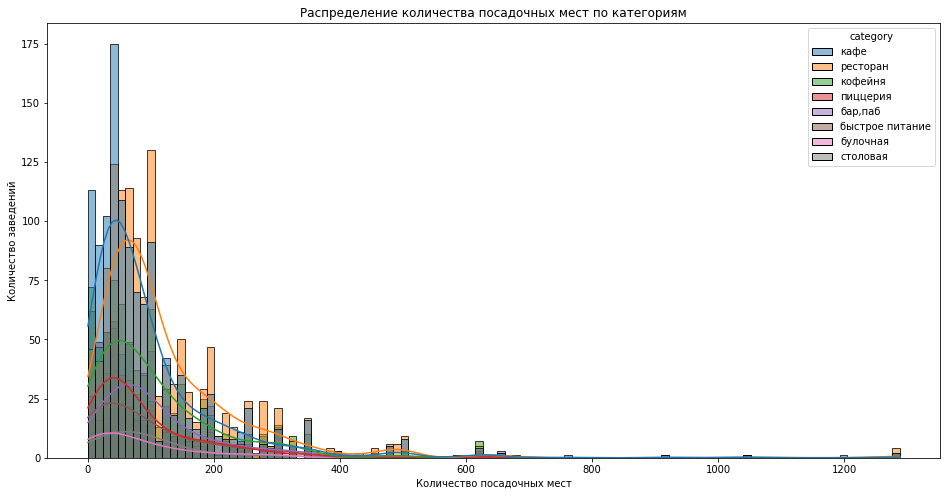

In [32]:
# Распределение количества посадочных мест для каждой категории (на одном графике)
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='seats', hue='category', kde=True)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.title('Распределение количества посадочных мест по категориям')
plt.show()

In [33]:
df[df['seats']>1000]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
2713,8d07e2d1810b4dca9d4cb247d0335df3,ваня и гоги,"бар,паб","москва, измайловское шоссе, 71, корп. а",восточный ао,"ежедневно, 11:00–06:00",4.2,0,1040.0,высокие,средний счёт:1000–2500 ₽,1750.0,NaN,False
2722,4731af3e68bb449fb2b34493fadfaed1,маргарита,быстрое питание,"москва, измайловское шоссе, 71, корп. а",восточный ао,"ежедневно, 10:00–22:00",4.3,1,1040.0,NaN,NaN,NaN,NaN,False
2770,4c196f841b0046b3ab3a60d3ed52bfc5,шоколадница,кофейня,"москва, измайловское шоссе, 71, корп. а",восточный ао,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",4.1,1,1040.0,NaN,NaN,NaN,NaN,False
2966,6b611f2fc2084078952aaef40780f11c,матрешка,кафе,"москва, измайловское шоссе, 71, корп. а",восточный ао,NaN,4.0,0,1040.0,NaN,NaN,NaN,NaN,NaN
4231,30d6c2abb42748bb98c01b1ed366e253,рестобар argomento,столовая,"москва, кутузовский проспект, 41, стр. 1",западный ао,"ежедневно, 12:00–23:00",4.2,0,1200.0,высокие,средний счёт:2500–5000 ₽,3750.0,NaN,False
6518,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",западный ао,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,средний счёт:1500–2000 ₽,1750.0,NaN,True
6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",западный ао,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,средний счёт:1500 ₽,1500.0,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",западный ао,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,NaN,NaN,NaN,NaN,False
6641,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",западный ао,"ежедневно, 08:30–20:00",4.3,1,1288.0,NaN,NaN,NaN,NaN,False
6658,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",западный ао,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,средние,средний счёт:700 ₽,700.0,NaN,False


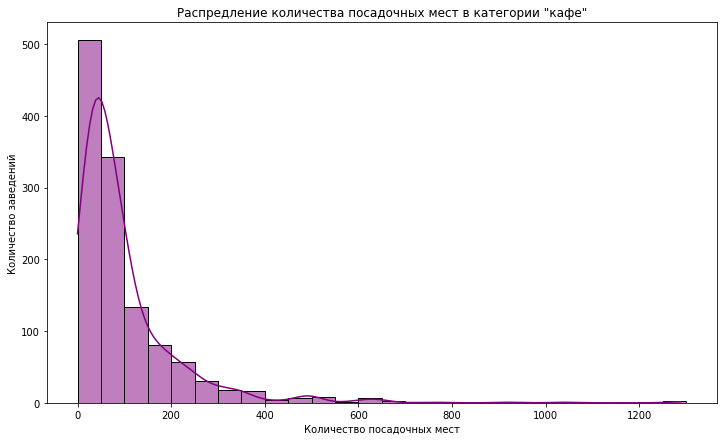

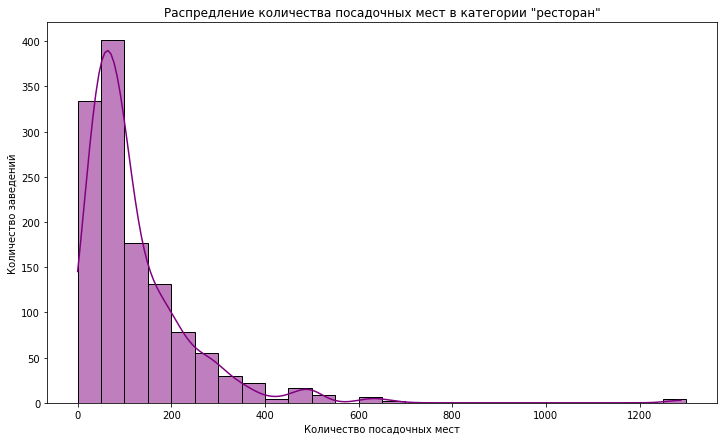

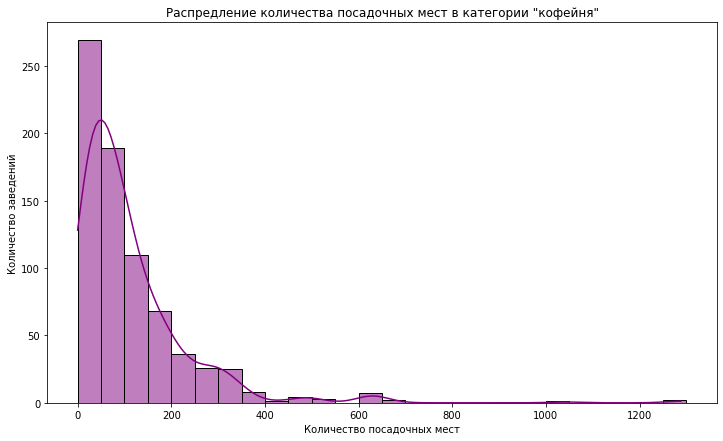

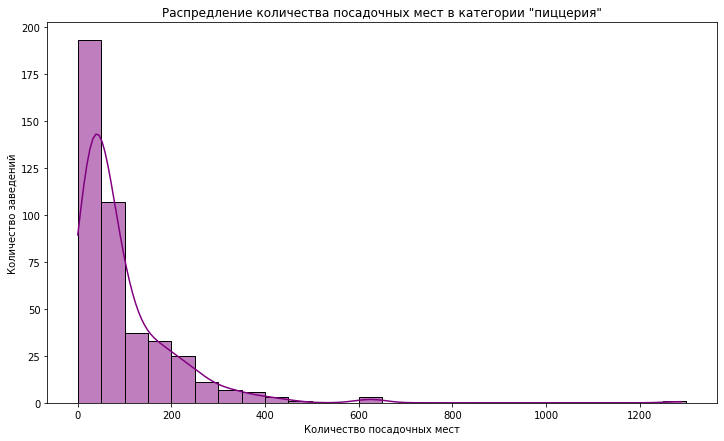

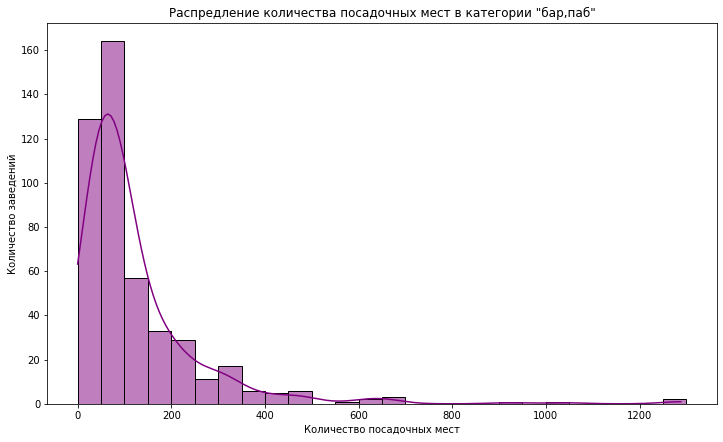

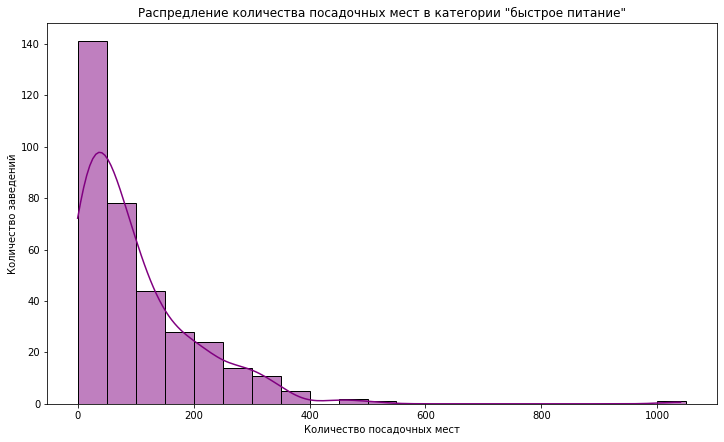

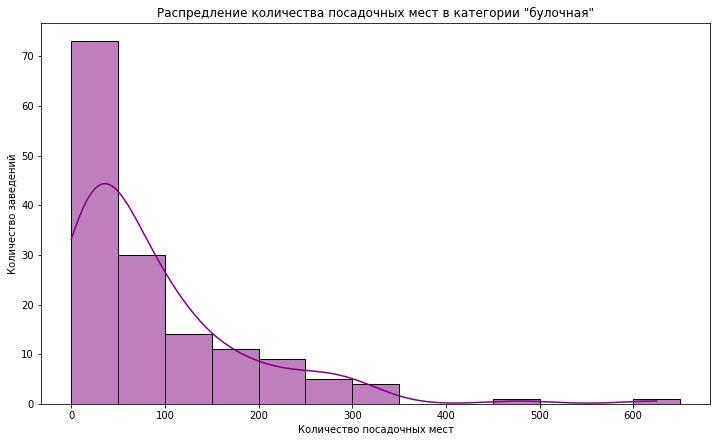

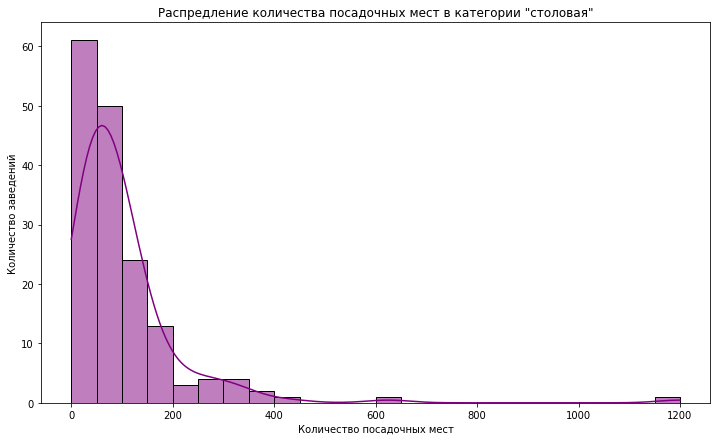

In [34]:
# Распределение количества посадочных мест для каждой категории (Все графики отдельно)
for category in df['category'].unique():
    plt.figure(figsize=(12, 7))
    t_df = df[df['category'] == category]
    sns.histplot(data=t_df, x='seats', kde=True, color='purple', binwidth=50)
    plt.title(f'Распредление количества посадочных мест в категории "{category}"')
    plt.xlabel('Количество посадочных мест')
    plt.ylabel('Количество заведений')
    plt.show()

Выводы:
  - Среднее количество посадочных мест составило: 108.4, медиана: 75, среди количества посадочных мест встречается 318 аномально больших значений, самые высокое из которых доходят до 1288.
  - У некоторых заведений с аномально большим количеством посадочных мест совпадает адресс нахождения кафе и количество посадочных мест, скорее всего у таких заведений общая площадь фудкорта и нет разделений посадочных мест для каждого заведения
  - Во всех категориях заведений самое распространенное количество посадочных мест огранично 100 шт.
  - Только в 2 категориях - ресторанах и барах/пабах количество посадочных мест чаще составляет от 50 до 100, в остальных категориях превалируют значения от 0 до 50.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

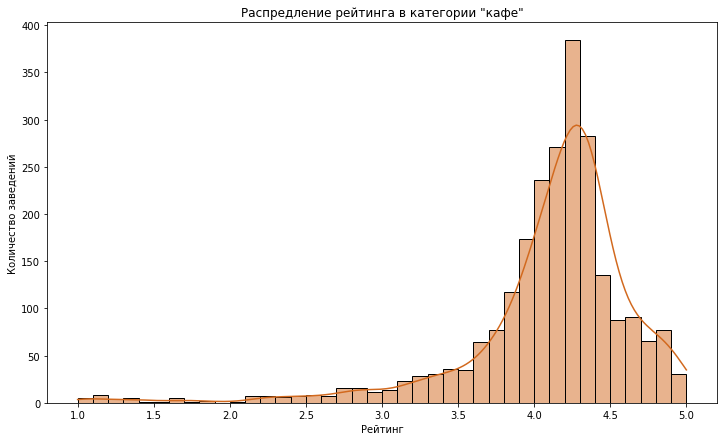

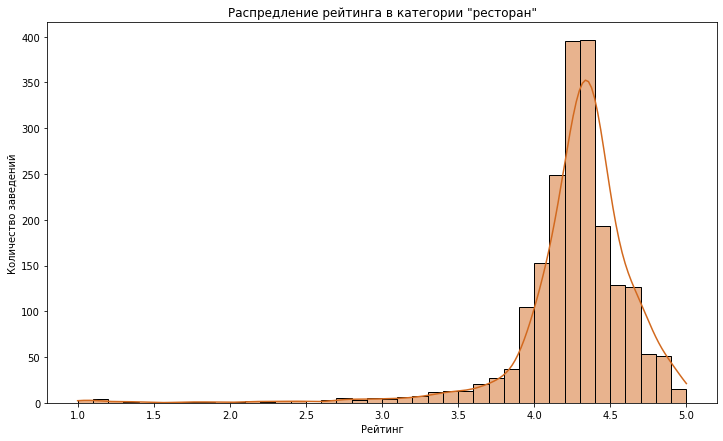

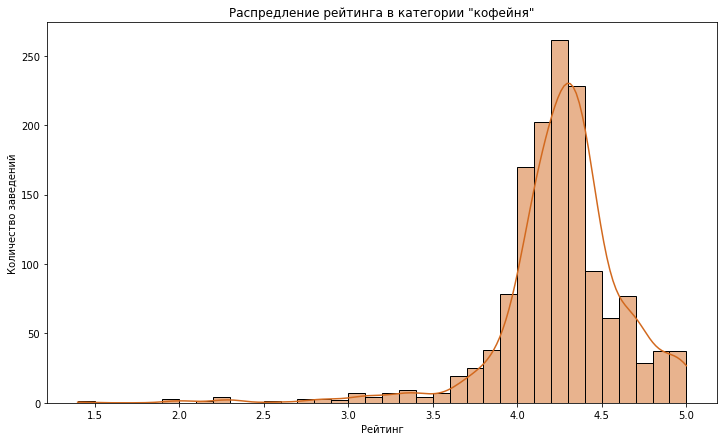

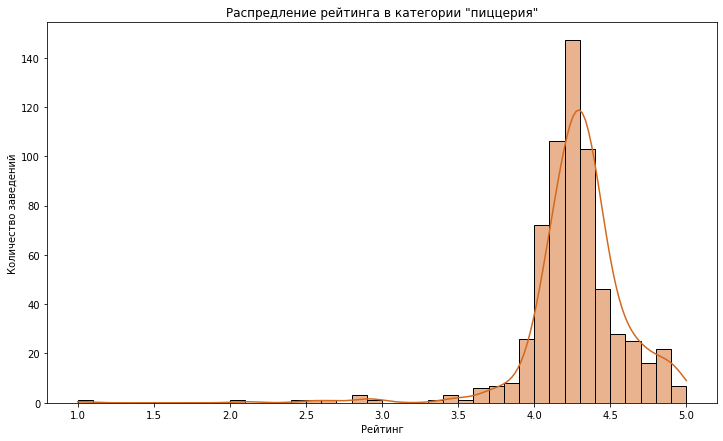

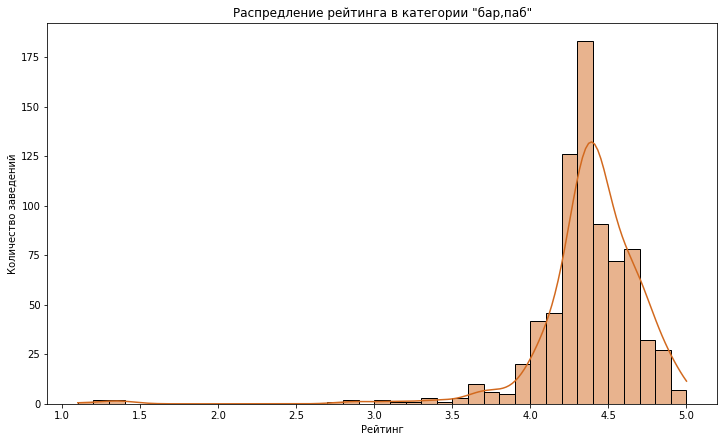

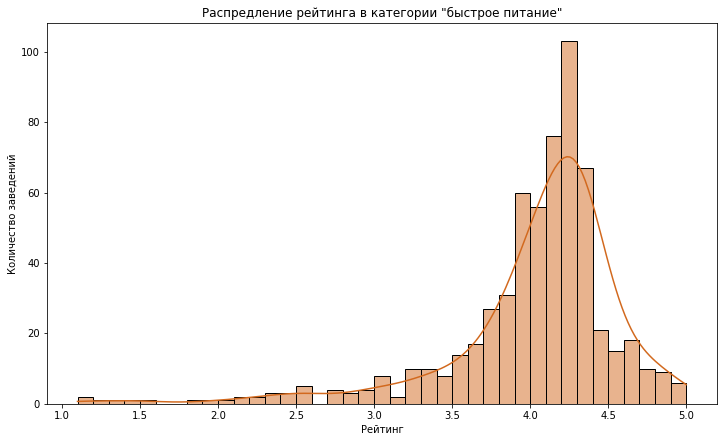

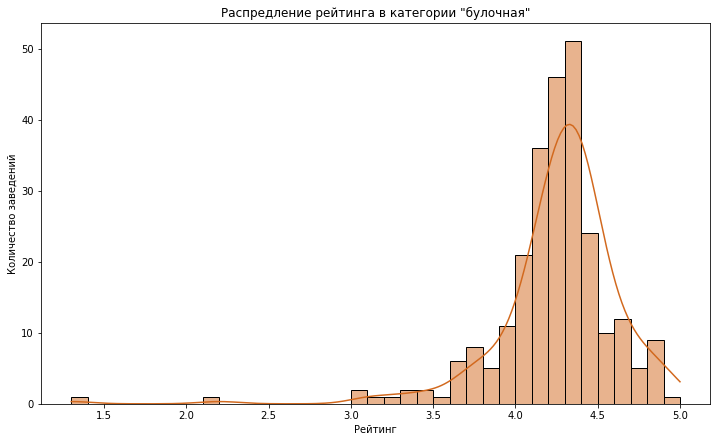

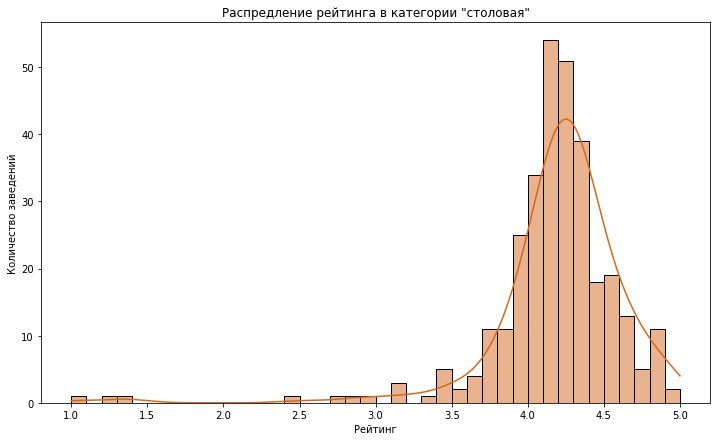

In [35]:
# Распределение рейтинга заведения для каждой категории
for category in df['category'].unique():
    plt.figure(figsize=(12, 7))
    t_df = df[df['category'] == category]
    sns.histplot(data=t_df, x='rating', kde=True, color='chocolate', binwidth=0.1)
    plt.title(f'Распредление рейтинга в категории "{category}"')
    plt.xlabel('Рейтинг')
    plt.ylabel('Количество заведений')
    plt.show()

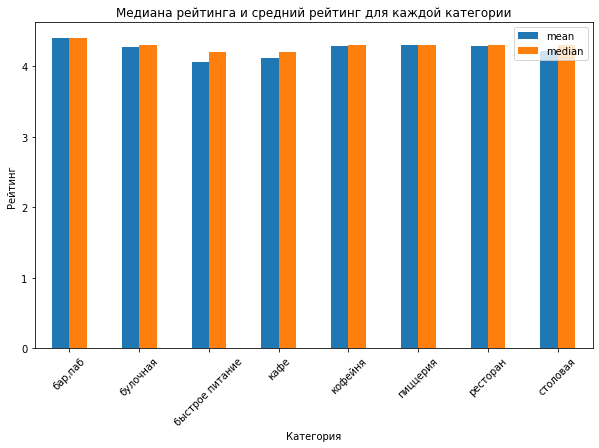

In [36]:
# Среднее
mean_df = df.groupby('category')['rating'].mean().reset_index()
mean_df['rating'] = round(mean_df['rating'], 2)
mean_df = mean_df.rename(columns={'rating': 'mean'})

# Медиана
median_df = df.groupby('category')['rating'].median().reset_index()
median_df['rating'] = round(median_df['rating'], 2)
median_df = median_df.rename(columns={'rating': 'median'})

# Объединение медианы и среднего в один датафрейм
for_graph = mean_df.merge(median_df, on='category')

# Столбчатая диаграмма
for_graph.plot(
    kind='bar',
    x='category',
    y=['mean', 'median'],
    figsize=(10, 6),
    title='Медиана рейтинга и средний рейтинг для каждой категории',
    rot=45,
    xlabel='Категория',
    ylabel='Рейтинг'
)

plt.show()

Выводы:
  - Распределние количества оценок у заведений в разных категориях очень похожи, большая часть заведений имеет рейтинг от 4 до 4.5
  - Медиана и среднее для каждой категории равны или почти равны, но распредления не являются нормальными, т.к. у каждой категории имеется левый хвост

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup']


<AxesSubplot:>

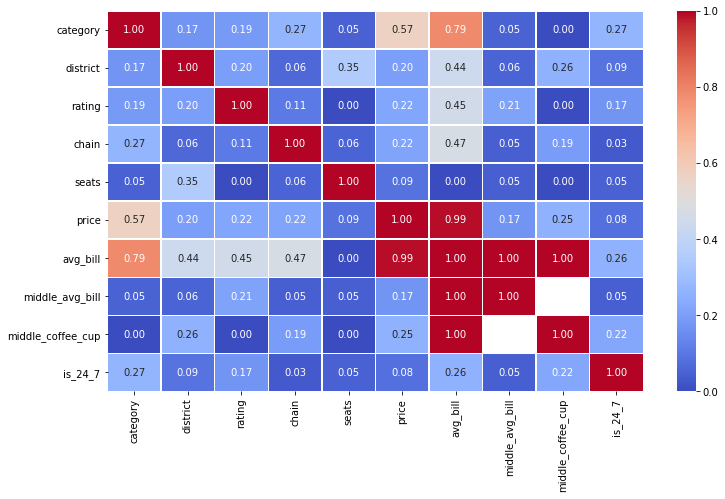

In [37]:
# Столбцы по которым ищем корреляцию
c_df = df[['category', 'district', 'rating', 'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', 'is_24_7']]

new_df = c_df.phik_matrix()

plt.figure(figsize=(12, 7))
sns.heatmap(data=new_df, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')

In [38]:
# Проверяем почему не считается корреляция между middle_coffee_cup и middle_avg_bill
check_df = df[['middle_coffee_cup', 'middle_avg_bill']]

check_df[(~check_df['middle_coffee_cup'].isna()) & (~check_df['middle_avg_bill'].isna())]

,middle_coffee_cup,middle_avg_bill


Из условий задания знаем, что значения middle_coffee_cup либо и middle_avg_bill заполняются на основе данных avg_bill таким образом, что либо заполнен middle_coffee_cup, либо middle_avg_bill. Потому пересечений между столбцами нет и корреляция не считается.

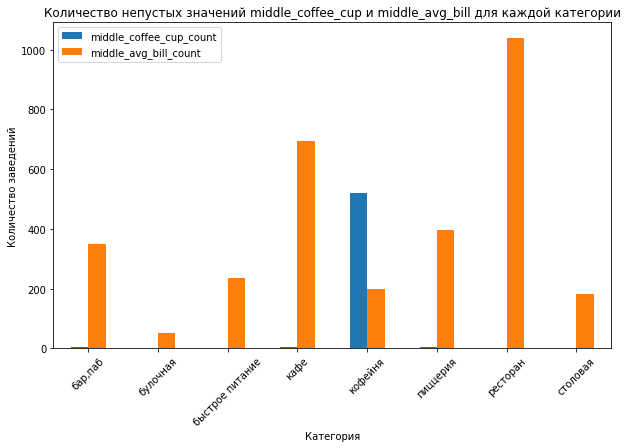

In [39]:
# Смотрим для каких категорий заполняется middle_coffee_cup, а для каких middle_avg_bill

t_df = df.groupby('category').agg(
    middle_coffee_cup_count=('middle_coffee_cup', 'count'),
    middle_avg_bill_count=('middle_avg_bill', 'count')
).reset_index()

t_df.plot(
    kind='bar',
    x='category',
    y=['middle_coffee_cup_count', 'middle_avg_bill_count'],
    figsize=(10, 6),
    title='Количество непустых значений middle_coffee_cup и middle_avg_bill для каждой категории',
    rot=45,
    xlabel='Категория',
    ylabel='Количество заведений'
)

plt.show()

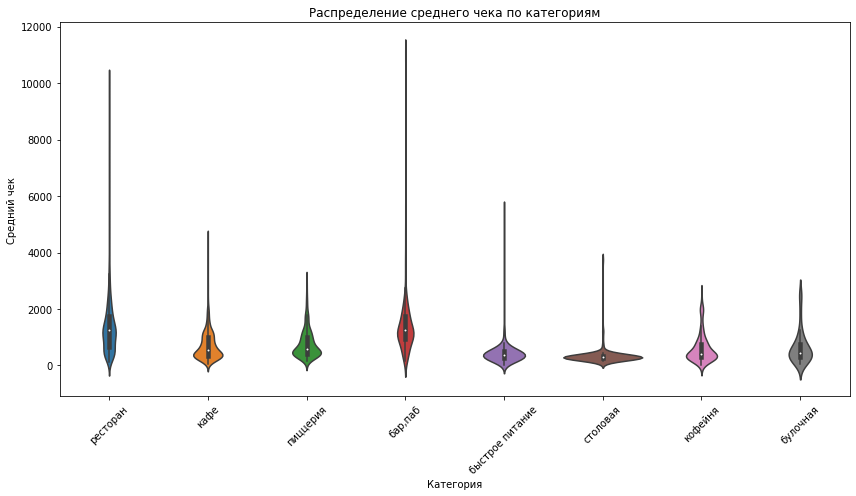

In [84]:
# Убираем 1 значение где middle_avg_bill аномально большое для удобства анализа графика
cutted_df = df[df['middle_avg_bill']<35_000]

plt.figure(figsize=(12, 7))

sns.violinplot(data=cutted_df, x='category', y='middle_avg_bill')
plt.title('Распределение среднего чека по категориям')
plt.xlabel('Категория')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выводы:
  - Корреляцию price, avg_bill, middle_avg_bill, middle_coffee_cup не рассматриваем, потому что столбцы заполняются на основе друг друга
  - Выявлена сильная корреляция (0.79) между категорией заведения и средним чеком. Эта корреляция была проверена (последняя картинка), эту связь лучше всего видно в категории столовых и быстрого питания.
  - Умеренная корреляция также наблюдается между средним чеком и округом (0.44), средним чеком и рейтингом (0.45), средним чеком и принадлежностью заведения к сетевому (0.47), округом и количеством посадочных мест (0.35)
  - Также стоит отметить возможную связь между категорией заведения и круглосуточной работой заведения (0.27), категорией заведения и принадлежностью заведения к сетевому (0.27), средний чеком и круглосуточной работой заведения (0.26)

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [77]:
# Отбираем только сетевые
t_df = df[df['chain']==1]

# Группируем + отбираем топ-15 по количеству заведений
grouped_t_df = t_df.groupby('name').agg(
    count=('name', 'count'),
    avg_rating=('rating', 'mean')
).sort_values(by='count', ascending=False).reset_index().head(15)

grouped_t_df

,name,count,avg_rating
0,шоколадница,120,4.177500
1,домино'с пицца,76,4.169737
2,додо пицца,74,4.286486
3,one price coffee,71,4.064789
4,яндекс лавка,69,3.872464
5,cofix,65,4.075385
6,prime,50,4.116000
7,хинкальная,44,4.322727
8,кофепорт,42,4.147619
9,кулинарная лавка братьев караваевых,39,4.394872


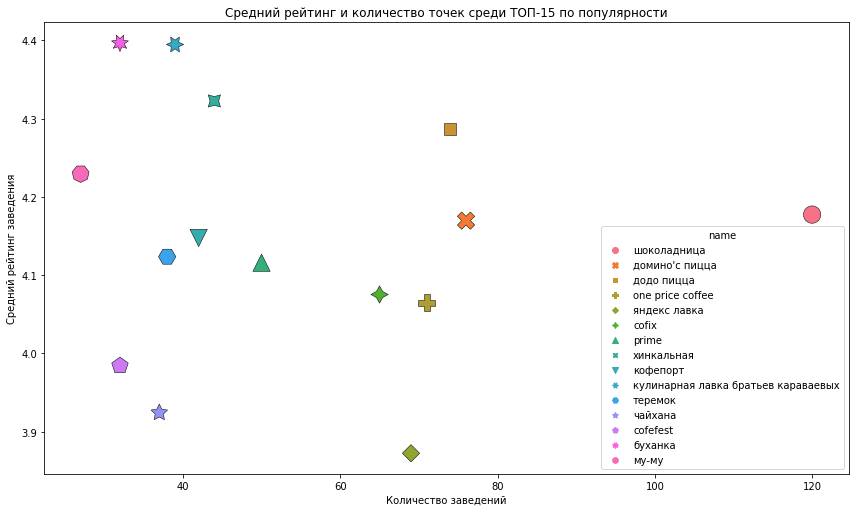

In [78]:
# Визуализация
plt.figure(figsize=(12, 7))

colors = sns.color_palette("husl", 15)

sns.scatterplot(data=grouped_t_df, x="count", y="avg_rating", hue='name', s=300,
               palette=colors, edgecolor='black', linewidth=0.5, style="name")

plt.tight_layout()
plt.xlabel('Количество заведений')
plt.ylabel('Средний рейтинг заведения')
plt.title('Средний рейтинг и количество точек среди ТОП-15 по популярности')
plt.show()

In [79]:
grouped_t_df = grouped_t_df.merge(df[['name', 'category']], on='name', how='left')
grouped_t_df.drop_duplicates(subset=['name', 'category'])

,name,count,avg_rating,category
0,шоколадница,120,4.177500,кофейня
7,шоколадница,120,4.177500,кафе
120,домино'с пицца,76,4.169737,пиццерия
197,додо пицца,74,4.286486,пиццерия
271,one price coffee,71,4.064789,кофейня
343,яндекс лавка,69,3.872464,ресторан
412,cofix,65,4.075385,кофейня
477,prime,50,4.116000,ресторан
514,prime,50,4.116000,кафе
527,хинкальная,44,4.322727,быстрое питание


Выводы:
  - Самой популярной сетью в Москве являтся шоколадница (120 заведений) и имееть на треть заведений больше чем сеть домино'с пицца (78 заведений) 
  - 1 сеть владеет более 80 заведений (шоколадница), 5 сетей владеют от 60 до 80 заведениями, остальные 9 владеют менее чем 60 заведений.
  - Многие заведения из топ-15 сетей относятся к разным категориям, можно отметить, что только пиццерии остаются только в 1 категории.
  - Средний рейтинг по сетям имеет небольшой разброс - от 3.87 у яндекс лавки до 4.4 у буханки

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


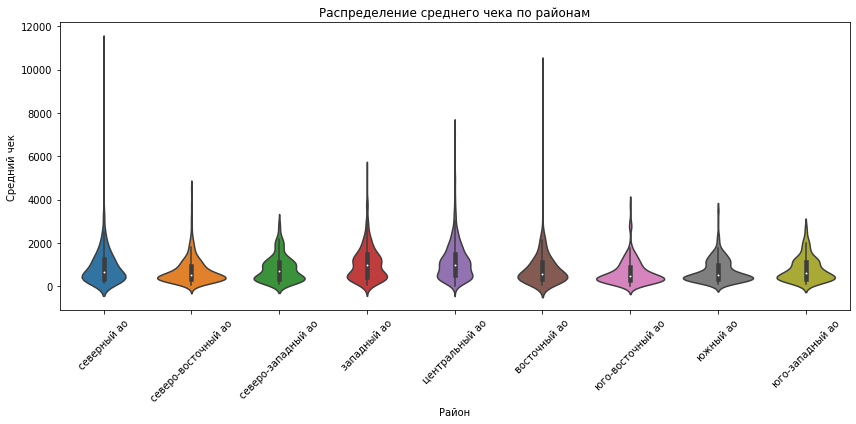

In [81]:
# Убрал аномальное значение ~35_000 в южном ао чтобы было видно картинку
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['middle_avg_bill']<35_000], x='district', y='middle_avg_bill')
plt.title('Распределение среднего чека по районам')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

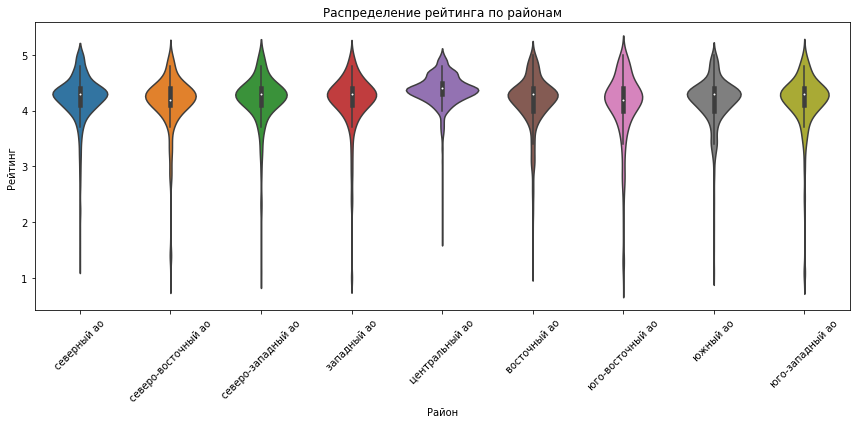

In [83]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='district', y='rating')
plt.title('Распределение рейтинга по районам')
plt.xlabel('Район')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

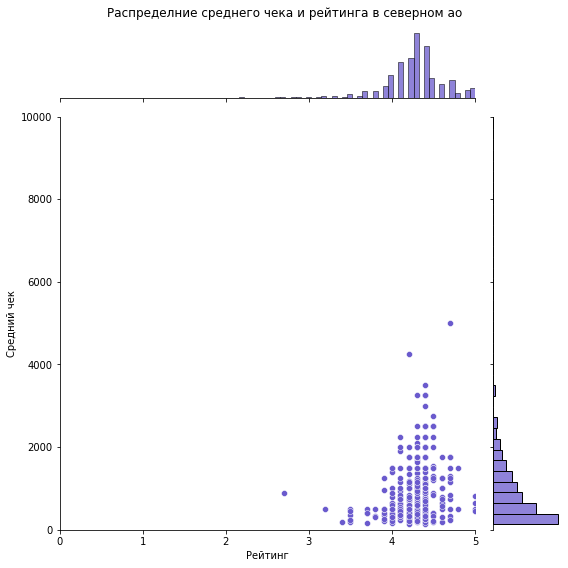

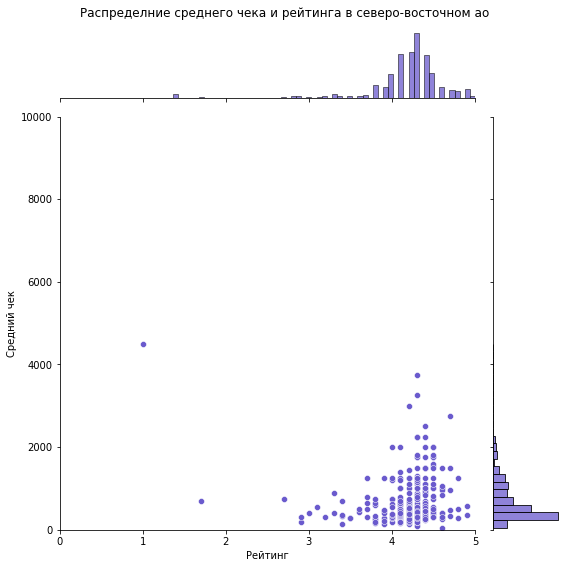

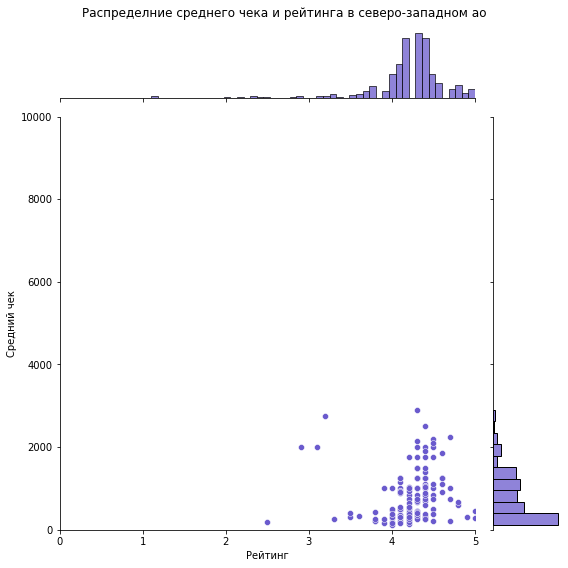

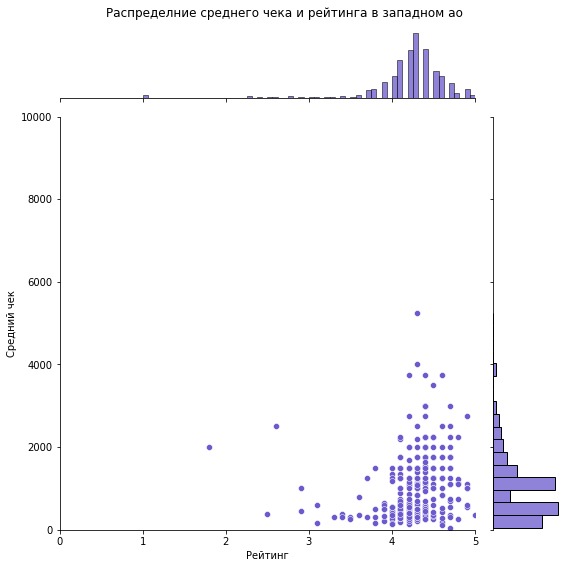

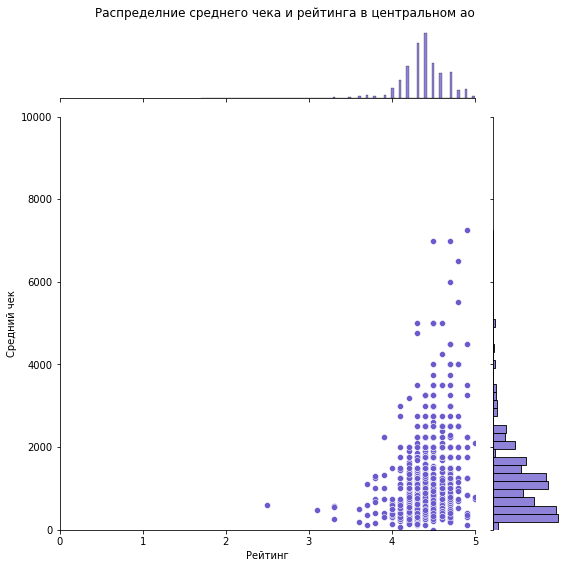

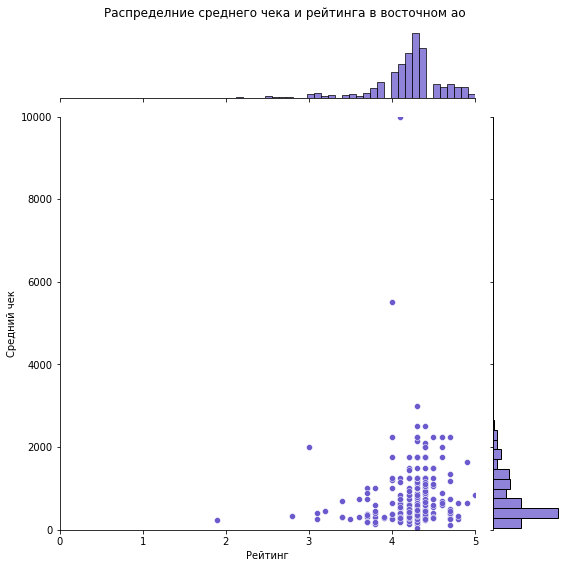

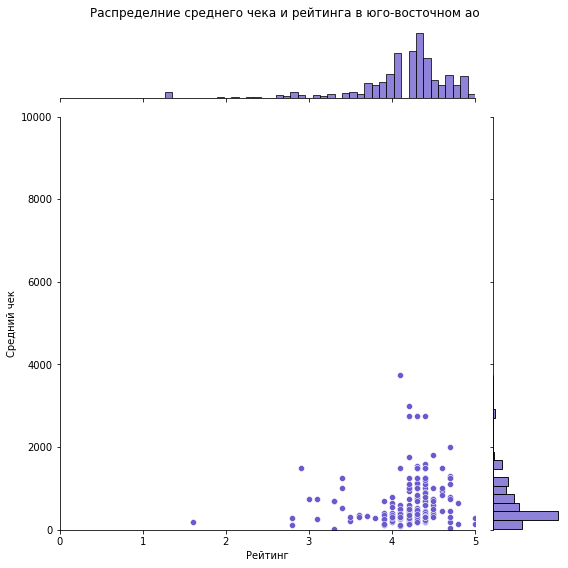

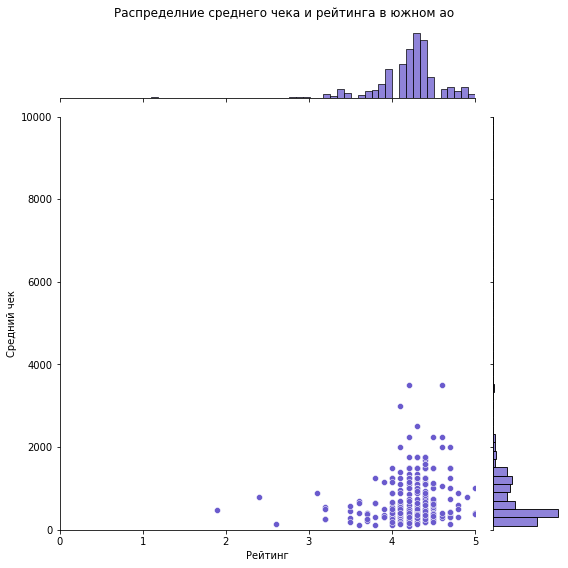

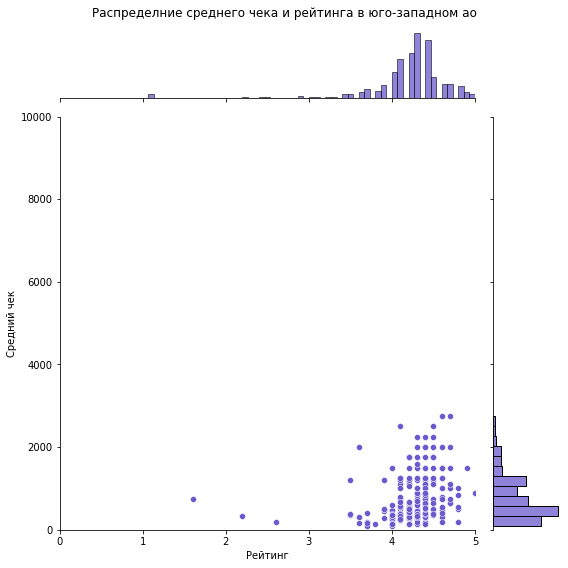

In [82]:
# Визуализация распределения среднего чека и рейтинга для каждого района
# Ограничил средний чек до 10к для удобного рассмотрения

for district in df['district'].unique():
    distric_df = df[df['district']==district]

    sns.jointplot(data=distric_df, x='rating', y='middle_avg_bill', kind='scatter', height=8,
                 color='slateblue', ylim=(0, 10_000), xlim=(0, 5)).set_axis_labels('Рейтинг', 'Средний чек')

    
    plt.suptitle(f'Распределние среднего чека и рейтинга в {district.replace("ый", "ом")}')
    plt.tight_layout()
    plt.show()

Выводы:
  - Визуально по распределениям среднего чека, округа можно разделить на 3 кластера:\
      1 кластер - юго-восточный, южный, юго-западный и северо-восточный округа - явно выделяются заведения с относительно низким средним чеком\
      2 кластер - северный, северо-западный и восточный округа - видно появление заведений с высоким средним чеком\
      3 кластер - центральный и западный округа - в количество заведений с низким и высоким чеком почти что уравнялось
  - Если рассмотривать расределение рейтинга по округам, то явно выделяется центральный как имеющий наибольшее количство оценок с высоким рейтингом. Остальные округа имеют примерно одинаковые распредления.
      

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

  - Наиболее популярными категориями заведений являются кафе и рестораны, в центральном округе также наблюдается резкое увеличение количества баров/пабов и кофеен. Также в центральном округе примерно в 2 раза больше заведений чем в среднем по другим округам
  - Несетевых заведений в 1.6 раз больше чем сетевых, особенно это видно в категории кафе и ресторанов.
  - В большей части заведений количество посадочных мест ограничено 100
  - Основная часть заведений имеет рейтинг от 4 до 4.5
  - Самое высокое значение среднего чека наблюдается в центральном и западном округах

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
  * Было проанализировано 8402 заведения общепита Москвы. ~38% заведений представлены сетями.
  * Нибольшее количество заведений наблюдается в категориях: кафе, рестораны и кофейни
  * В центральном округе количество заведений примерно в раза больше чем в среднем по другим округам, также в этом районе наблюдается высокий средний чек и самый высокий средний рейтинг.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.
  * В целом нужно отметить, что выбор округа расположения, обеспечение хорошего рейтинга, ценовая политика и категория заведения (последние 2 имеют достаточно сильную корреляцию и пока что нельзя точно сказать какой является определяющим) является крайне важными факторами, которые необходимо учитывать при открытии заведения общепита

